In [55]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
%matplotlib inline 

from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")


#import shap
# load JS visualization code to notebook
#shap.initjs()

import warnings
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv('aprueba.csv')
df

SECTOR UNIDAD DE MILES Y MONEDA EN QUE SE EXPLERSAN CIFRAS TOTAL ACTIVOS  \
0        4                                                 M$         242547   
1       10                                                MM$        2527286   
2        4                                                 M$      106817625   
3        4                                                 M$       82401809   
4        4                                                MM$       15861015   
..     ...                                                ...            ...   
63       4                                                 M$     1207166639   
64       4                                               MUS$         492645   
65      10                                                 M$      547684695   
66      10                                                MM$         285310   
67       3                                                 M$     1589118572   

   TOTAL PASIVOS TOTAL PATRIMONIO   CAPITAL  \
0          83543           159004     50819   
1         699438          1827848     40347   
2        9574477         97243148    930000   
3       25788989         82401890  20761594   
4        7416173          8444842      4482   
..           ...              ...       ...   
63     851731487        355435152   7974480   
64        348288           144357      1367   
65      34961502        512723193      1609   
66         15943           269367       126   
67    1056596843        532521729  27688191   

   INGRESOS ORDINARIOS (DE LA OPERACIÓN O EXPLOTACIÓN)  \
0                                              211031    
1                                              812777    
2                                             6921428    
3                                             1733012    
4                                              922676    
..                                                ...    
63                                          925874862    
64                                              86270    
65                                           15633081    
66                                               7390    
67                                         2851797232    

   UTILIDAD O PÉRDIDA NETA (DESPUÉS DE IMPTOS) ROA (resultados sobre activos)  \
0                                        22904              0.094431182410007   
1                                       442791              0.175204151805534   
2                                      3378764              0.031631147013426   
3                                       894515              0.010855526242148   
4                                       451726              0.028480270651027   
..                                         ...                            ...   
63                                    39569205              0.032778577307917   
64                                       10619              0.021555075155538   
65                                     1543310              0.002817880459486   
66                                       21114              0.074003715257089   
67                                   275434252              0.173325173371644   

   ROE (resultados sobre patrimonio) Endeudamiento (Pasivo sobre activo)  \
0                  0.144046690649292                   0.344440458962593   
1                  0.242247167160508                   0.276754589706112   
2                  0.034745522635693                   0.089633868942508   
3                  0.010855515571306                   0.312966296650114   
4                  0.053491350104596                   0.467572409458033   
..                               ...                                 ...   
63                   0.1113260879723                   0.705562479514479   
64                  0.07356068635397                   0.706975611241361   
65                 0.003010025723568                   0.063835090370747   
66                 0.078383766385638            

In [93]:
from sklearn.preprocessing import LabelEncoder

# Lista de columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Instancia de LabelEncoder
lab = LabelEncoder()

# Aplicar LabelEncoder solo a las columnas que contienen cadenas
for column in categorical_columns:
    if df[column].dtype == 'object':
        df[column] = lab.fit_transform(df[column].astype(str))

# Ahora, las variables categóricas en todas las columnas deben ser numéricas

In [94]:
df.corr()

SECTOR  \
SECTOR                                              1.000000   
UNIDAD DE MILES Y MONEDA EN QUE SE EXPLERSAN CI... -0.101412   
TOTAL ACTIVOS                                       0.082390   
TOTAL PASIVOS                                      -0.214198   
TOTAL PATRIMONIO                                    0.003720   
CAPITAL                                             0.223982   
INGRESOS ORDINARIOS (DE LA OPERACIÓN O EXPLOTAC... -0.039634   
UTILIDAD O PÉRDIDA NETA (DESPUÉS DE IMPTOS)         0.039611   
ROA (resultados sobre activos)                      0.101613   
ROE (resultados sobre patrimonio)                   0.124507   
Endeudamiento (Pasivo sobre activo)                -0.002090   
Tamaño 1 (Capital sobre patrimonio)                 0.006164   
Tamaño 2 (Activo sobre patrimonio)                 -0.016238   
FECHA DE CORTE CONTABLE DE LAS CIFRAS INGRESADAS    0.165878   
N° DE INTEGRANTES DEL CONSEJO DE ADMINISTRACIÓN...  0.035378   
N° DE MUJERES EN EL CONSEJO O DIRECTORIO            0.147627   
AUDITOR                                             0.092054   

                                                    UNIDAD DE MILES Y MONEDA EN QUE SE EXPLERSAN CIFRAS  \
SECTOR                                                                                      -0.101412     
UNIDAD DE MILES Y MONEDA EN QUE SE EXPLERSAN CI...                                           1.000000     
TOTAL ACTIVOS                                                                                0.091595     
TOTAL PASIVOS                                                                                0.011514     
TOTAL PATRIMONIO                                                                            -0.196220     
CAPITAL                                                                                     -0.207223     
INGRESOS ORDINARIOS (DE LA OPERACIÓN O EXPLOTAC...                                           0.198421     
UTILIDAD O PÉRDIDA NETA (DESPUÉS DE IMPTOS)                                                  0.139541     
ROA (resultados sobre activos)                                                              -0.235632     
ROE (resultados sobre patrimonio)                                                           -0.105834     
Endeudamiento (Pasivo sobre activo)                                                          0.217143     
Tamaño 1 (Capital sobre patrimonio)                                                         -0.126124     
Tamaño 2 (Activo sobre patrimonio)                                                           0.209132     
FECHA DE CORTE CONTABLE DE LAS CIFRAS INGRESADAS                                             0.110742     
N° DE INTEGRANTES DEL CONSEJO DE ADMINISTRACIÓN...                                           0.143844     
N° DE MUJERES EN EL CONSEJO O DIRECTORIO                                                     0.034217     
AUDITOR                                                                                      0.237833     

                                                    TOTAL ACTIVOS  \
SECTOR                                                   0.082390   
UNIDAD DE MILES Y MONEDA EN QUE SE EXPLERSAN CI...       0.091595   
TOTAL ACTIVOS                                            1.000000   
TOTAL PASIVOS                                           -0.115731   
TOTAL PATRIMONIO                                        -0.054159   
CAPITAL                                                 -0.097739   
INGRESOS ORDINARIOS (DE LA OPERACIÓN O EXPLOTAC...      -0.256755   
UTILIDAD O PÉRDIDA NETA (DESPUÉS DE IMPTOS)             -0.354206   
ROA (resultados sobre activos)                          -0.068808   
ROE (resultados sobre patrimonio)                       -0.028666   
Endeudamiento (Pasivo sobre activo)                     -0.017426   
Tamaño 1 (Capital sobre patrimonio)                      0.075845   
Tamaño 2 (Activo sobre patrimonio)                      -0.039018   
FECHA DE

In [95]:
from sklearn import preprocessing
comercio_value = df.copy().values
min_max_scaler = preprocessing.MinMaxScaler()
comercio_scaled = min_max_scaler.fit_transform(comercio_value)
comercio_df_scaled = pd.DataFrame(comercio_scaled, columns=df.columns)
comercio_df_scaled

SECTOR  UNIDAD DE MILES Y MONEDA EN QUE SE EXPLERSAN CIFRAS  \
0   0.214286                                                0.0     
1   0.642857                                                0.5     
2   0.214286                                                0.0     
3   0.214286                                                0.0     
4   0.214286                                                0.5     
..       ...                                                ...     
63  0.214286                                                0.0     
64  0.214286                                                1.0     
65  0.642857                                                0.0     
66  0.642857                                                0.5     
67  0.142857                                                0.0     

    TOTAL ACTIVOS  TOTAL PASIVOS  TOTAL PATRIMONIO   CAPITAL  \
0        0.454545       0.924242          0.181818  0.000162   
1        0.500000       0.772727          0.272727  0.000128   
2        0.000000       1.000000          0.984848  0.002966   
3        0.924242       0.393939          0.909091  0.066232   
4        0.227273       0.803030          0.939394  0.000014   
..            ...            ...               ...       ...   
63       0.045455       0.969697          0.560606  0.025439   
64       0.712121       0.439394          0.121212  0.000004   
65       0.727273       0.454545          0.712121  0.000005   
66       0.560606       0.242424          0.484848  0.000000   
67       0.242424       0.015152          0.772727  0.088328   

    INGRESOS ORDINARIOS (DE LA OPERACIÓN O EXPLOTACIÓN)  \
0                                            0.276923     
1                                            0.815385     
2                                            0.769231     
3                                            0.184615     
4                                            0.907692     
..                                                ...     
63                                           0.938462     
64                                           0.861538     
65                                           0.138462     
66                                           0.784615     
67                                           0.415385     

    UTILIDAD O PÉRDIDA NETA (DESPUÉS DE IMPTOS)  \
0                                      0.338462   
1                                      0.707692   
2                                      0.553846   
3                                      0.969231   
4                                      0.723077   
..                                          ...   
63                                     0.646154   
64                                     0.015385   
65                                     0.138462   
66                                     0.307692   
67                                     0.476923   

    ROA (resultados sobre activos)  ROE (resultados sobre patrimonio)  \
0                         0.854839                           0.809524   
1                         0.951613                           0.904762   
2                         0.596774                           0.285714   
3                         0.161290                           0.063492   
4                         0.516129                           0.444444   
..                             ...                                ...   
63                        0.629032                           0.650794   
64                        0.387097                           0.539683   
65                        0.064516                           0.031746   
66                        0.822581                           0.555556   
67                        0.935484                           0.984127   

    Endeudamiento (Pasivo sobre activo)  Tamaño 1 (Capital sobre patrimonio)  \
0                              0.292308                             0.861538   
1                              0.184615          

In [96]:
comercio_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 17 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   SECTOR                                                                  68 non-null     float64
 1   UNIDAD DE MILES Y MONEDA EN QUE SE EXPLERSAN CIFRAS                     68 non-null     float64
 2   TOTAL ACTIVOS                                                           68 non-null     float64
 3   TOTAL PASIVOS                                                           68 non-null     float64
 4   TOTAL PATRIMONIO                                                        68 non-null     float64
 5   CAPITAL                                                                 68 non-null     float64
 6   INGRESOS ORDINARIOS (DE LA OPERACIÓN O EXPLOTACIÓN)                     68 non-null 

In [97]:
#Verifico los datos faltantes del dataset o nulos
comercio_df_scaled.isnull().sum()

SECTOR                                                                    0
UNIDAD DE MILES Y MONEDA EN QUE SE EXPLERSAN CIFRAS                       0
TOTAL ACTIVOS                                                             0
TOTAL PASIVOS                                                             0
TOTAL PATRIMONIO                                                          0
CAPITAL                                                                   0
INGRESOS ORDINARIOS (DE LA OPERACIÓN O EXPLOTACIÓN)                       0
UTILIDAD O PÉRDIDA NETA (DESPUÉS DE IMPTOS)                               0
ROA (resultados sobre activos)                                            0
ROE (resultados sobre patrimonio)                                         0
Endeudamiento (Pasivo sobre activo)                                       0
Tamaño 1 (Capital sobre patrimonio)                                       0
Tamaño 2 (Activo sobre patrimonio)                                        0
FECHA DE COR

In [98]:
from sklearn.impute import SimpleImputer

# Imputar NaN con ceros
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_imputed = pd.DataFrame(imputer.fit_transform(comercio_df_scaled), columns=df.columns)

In [99]:
#Verifico los datos faltantes del dataset o nulos
df_imputed.isnull().sum()

SECTOR                                                                    0
UNIDAD DE MILES Y MONEDA EN QUE SE EXPLERSAN CIFRAS                       0
TOTAL ACTIVOS                                                             0
TOTAL PASIVOS                                                             0
TOTAL PATRIMONIO                                                          0
CAPITAL                                                                   0
INGRESOS ORDINARIOS (DE LA OPERACIÓN O EXPLOTACIÓN)                       0
UTILIDAD O PÉRDIDA NETA (DESPUÉS DE IMPTOS)                               0
ROA (resultados sobre activos)                                            0
ROE (resultados sobre patrimonio)                                         0
Endeudamiento (Pasivo sobre activo)                                       0
Tamaño 1 (Capital sobre patrimonio)                                       0
Tamaño 2 (Activo sobre patrimonio)                                        0
FECHA DE COR

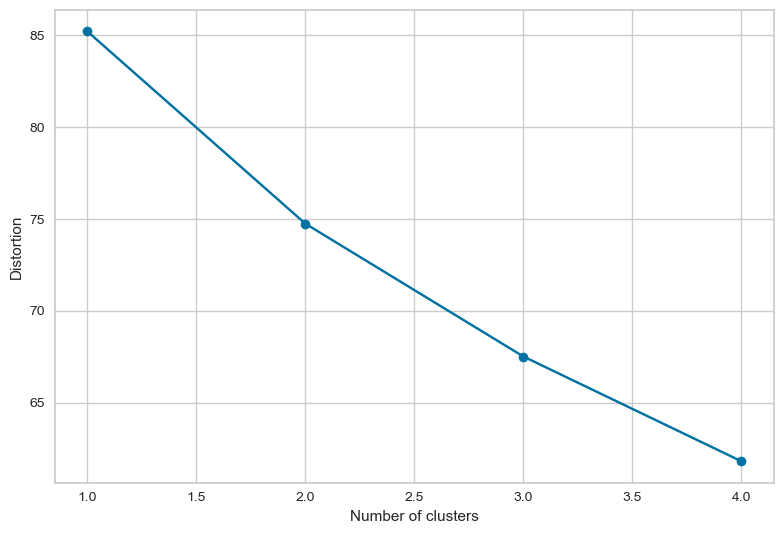

In [100]:
#1. Forma de Elbow Method for K means funete: Sebastian Raschka
distortions = []
for i in range(1, 5):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df_imputed)
    distortions.append(km.inertia_)
plt.plot(range(1, 5), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

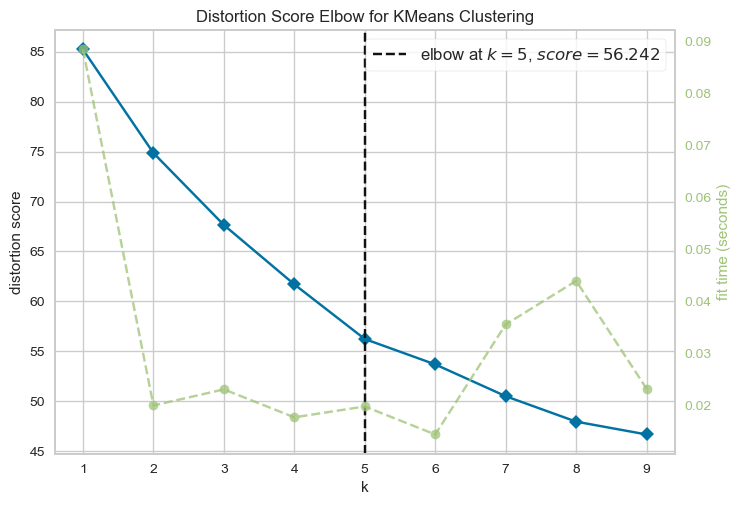

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [101]:
# 2. Forma de Elbow Method for K means- Fuente: Indraneel Dutta Baruah
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,10), timings= True)
visualizer.fit(df_imputed)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [102]:
from sklearn.cluster import KMeans
# Realiza el clustering con K-Means
kmeans = KMeans(n_clusters=4)  # Número de clusters obtenidos tecnicas de clusters
labels = kmeans.fit_predict(df_imputed)

In [103]:
# Agregación de las etiquetas numéricas al DataFrame
df['cluster_label'] = labels

In [104]:
from sklearn.ensemble import RandomForestClassifier

X_comercio = df_imputed  # Tus características
y_comercio = df['cluster_label']  # La etiqueta numérica que hemos asignado

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(df_imputed, y_comercio)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [105]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(X_comercio), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

In [106]:
feature_importances_sorted

ROE (resultados sobre patrimonio)                                         0.153246
Tamaño 2 (Activo sobre patrimonio)                                        0.133715
AUDITOR                                                                   0.109545
Endeudamiento (Pasivo sobre activo)                                       0.108500
ROA (resultados sobre activos)                                            0.102849
TOTAL PATRIMONIO                                                          0.063458
TOTAL PASIVOS                                                             0.055572
CAPITAL                                                                   0.048783
INGRESOS ORDINARIOS (DE LA OPERACIÓN O EXPLOTACIÓN)                       0.041124
TOTAL ACTIVOS                                                             0.037699
Tamaño 1 (Capital sobre patrimonio)                                       0.037350
SECTOR                                                                    0.026820
UTIL

<Axes: >

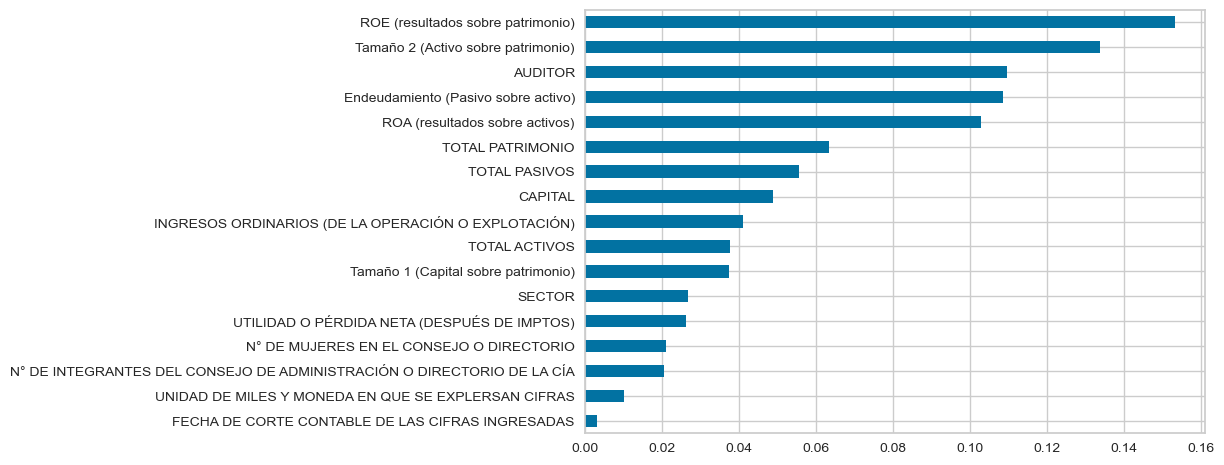

In [107]:
from matplotlib import pyplot as plt
for_plot = pd.DataFrame({'x_axis':X_comercio.columns, 'y_axis':feature_importances_sorted}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh()

In [108]:
'''Reducimos el conjunto de datos a las 8 características las más importantes mirando la imagen anterior
pero vemos adelante que a mayor # de caract. más componenestes y mayor explicabilidad '''
X_reduced = X_comercio[list(feature_importances_sorted.head(8).index)].copy()
X_reduced

ROE (resultados sobre patrimonio)  Tamaño 2 (Activo sobre patrimonio)  \
0                            0.809524                            0.296875   
1                            0.904762                            0.203125   
2                            0.285714                            0.125000   
3                            0.063492                            0.015625   
4                            0.444444                            0.437500   
..                                ...                                 ...   
63                           0.650794                            0.828125   
64                           0.539683                            0.843750   
65                           0.031746                            0.046875   
66                           0.555556                            0.031250   
67                           0.984127                            0.734375   

    AUDITOR  Endeudamiento (Pasivo sobre activo)  \
0       1.0                             0.292308   
1       1.0                             0.184615   
2       0.0                             0.107692   
3       1.0                             0.215385   
4       1.0                             0.430769   
..      ...                                  ...   
63      1.0                             0.769231   
64      1.0                             0.784615   
65      1.0                             0.030769   
66      1.0                             0.015385   
67      1.0                             0.676923   

    ROA (resultados sobre activos)  TOTAL PATRIMONIO  TOTAL PASIVOS   CAPITAL  
0                         0.854839          0.181818       0.924242  0.000162  
1                         0.951613          0.272727       0.772727  0.000128  
2                         0.596774          0.984848       1.000000  0.002966  
3                         0.161290          0.909091       0.393939  0.066232  
4                         0.516129          0.939394       0.803030  0.000014  
..                             ...               ...            ...       ...  
63                        0.629032          0.560606       0.969697  0.025439  
64                        0.387097          0.121212       0.439394  0.000004  
65                        0.064516          0.712121       0.454545  0.000005  
66                        0.822581          0.484848       0.242424  0.000000  
67                        0.935484          0.772727       0.015152  0.088328  

[68 rows x 8 columns]

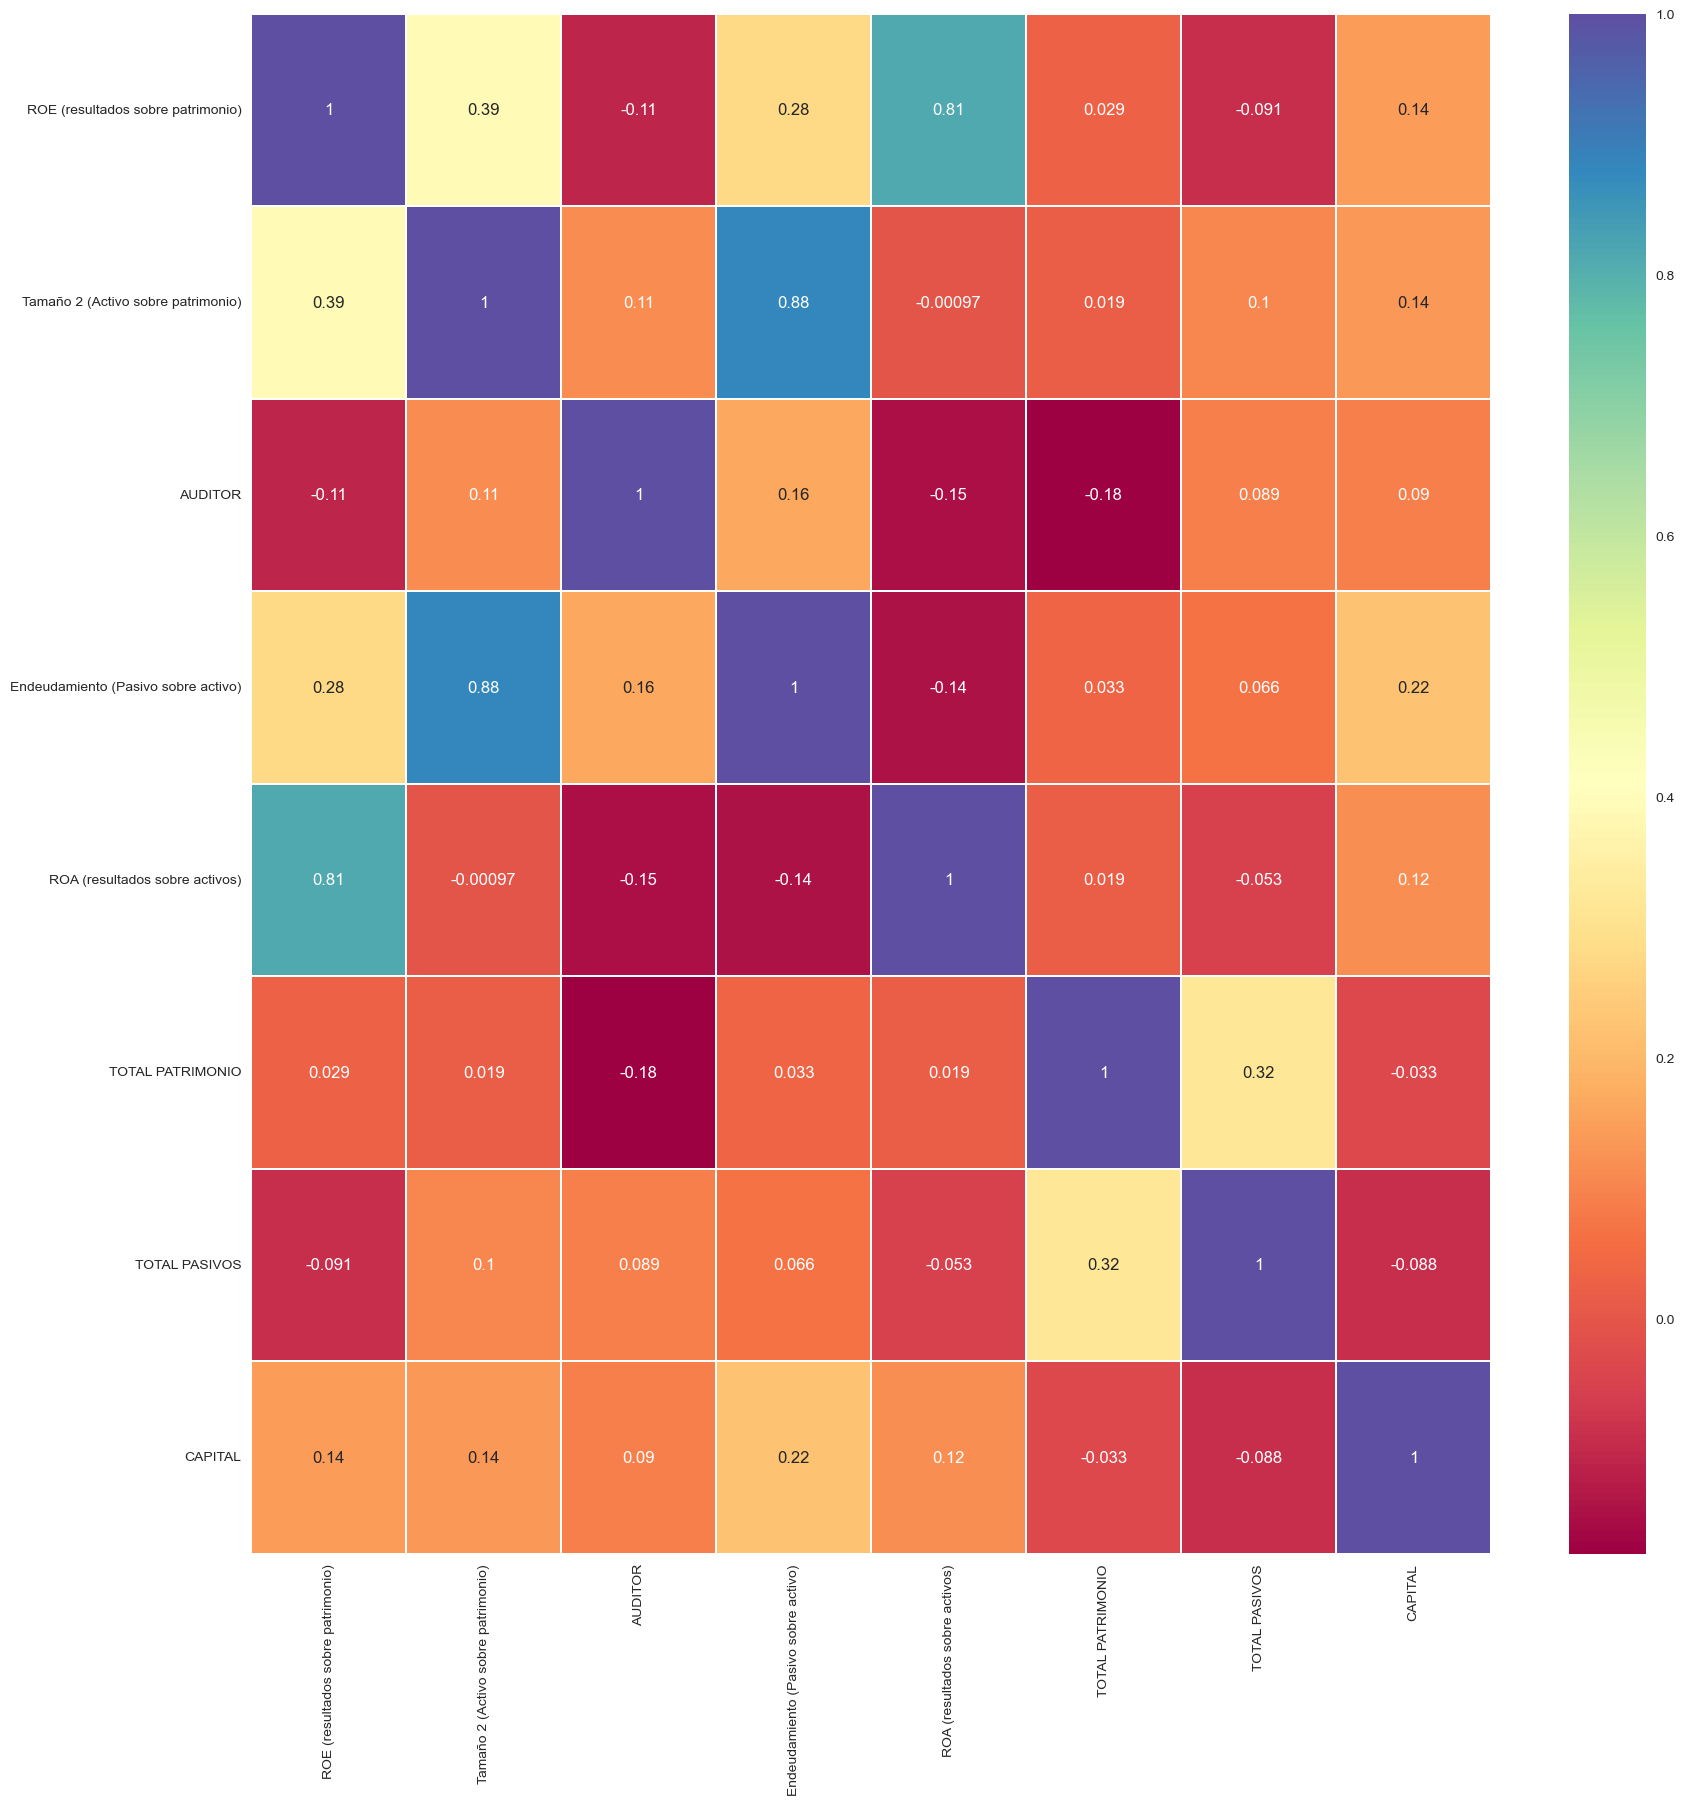

In [109]:
# Volvemos a mirar la correlación de variables mediante heatmap
sns.heatmap(X_reduced.corr(),annot=True, cmap='Spectral', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [110]:
#No esta desbalacedao no necesita balanceo
y_comercio.value_counts()

cluster_label
2    24
1    18
0    17
3     9
Name: count, dtype: int64

In [111]:
X_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ROE (resultados sobre patrimonio)    68 non-null     float64
 1   Tamaño 2 (Activo sobre patrimonio)   68 non-null     float64
 2   AUDITOR                              68 non-null     float64
 3   Endeudamiento (Pasivo sobre activo)  68 non-null     float64
 4   ROA (resultados sobre activos)       68 non-null     float64
 5   TOTAL PATRIMONIO                     68 non-null     float64
 6   TOTAL PASIVOS                        68 non-null     float64
 7   CAPITAL                              68 non-null     float64
dtypes: float64(8)
memory usage: 4.4 KB


In [112]:
from sklearn.decomposition import PCA

# Lista para almacenar la información de varianza explicada por cada número de componentes
variance_explained_info = []

for comp in range(2, X_reduced.shape[1]):
    modelo_pca = PCA(n_components=comp)
    modelo_pca.fit(X_reduced)
    comp_check = modelo_pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        # Almacenar la información de varianza explicada
        variance_explained_info.append((final_comp, comp_check.sum(), comp_check))
        break

Final_PCA = PCA(n_components=final_comp)
Final_PCA.fit(X_reduced)
cluster_df = Final_PCA.transform(X_reduced)

num_comps = comp_check.shape[0]

# Imprimir la información de varianza explicada para cada número de componentes
for info in variance_explained_info:
    print("Using {} components, we can explain {}% of the variability in the original data.".format(info[0], info[1]))
    print("Explained variance ratio for each component:", info[2])

Using 4 components, we can explain 0.8618695723056986% of the variability in the original data.
Explained variance ratio for each component: [0.28939444 0.24820442 0.17947106 0.14479964]


In [113]:
#Se convierte el array a dataframe para añadir nombrs a los ejes(x=Componentes, Y=caracteriticas)
pd.DataFrame(modelo_pca.components_,columns=X_reduced.columns,index = [f'PC-{i+1}' for i in range(final_comp)]).T

PC-1      PC-2      PC-3      PC-4
ROE (resultados sobre patrimonio)   -0.549894  0.377669 -0.114824 -0.145313
Tamaño 2 (Activo sobre patrimonio)  -0.563555 -0.311510  0.089873  0.209780
AUDITOR                             -0.040448 -0.508517 -0.457193 -0.666864
Endeudamiento (Pasivo sobre activo) -0.506660 -0.389362  0.085131  0.250230
ROA (resultados sobre activos)      -0.335113  0.564192 -0.148385 -0.344112
TOTAL PATRIMONIO                    -0.040564  0.061766  0.681289 -0.211188
TOTAL PASIVOS                       -0.027997 -0.166748  0.522619 -0.514332
CAPITAL                             -0.083383 -0.014234 -0.056234  0.001910

In [114]:
#Se convierte el array a dataframe para añadir nombrs a los ejes(x=Componentes, Y=caracteriticas)
pd.DataFrame(modelo_pca.components_,columns=X_reduced.columns,index = [f'PC-{i+1}' for i in range(final_comp)]).T

PC-1      PC-2      PC-3      PC-4
ROE (resultados sobre patrimonio)   -0.549894  0.377669 -0.114824 -0.145313
Tamaño 2 (Activo sobre patrimonio)  -0.563555 -0.311510  0.089873  0.209780
AUDITOR                             -0.040448 -0.508517 -0.457193 -0.666864
Endeudamiento (Pasivo sobre activo) -0.506660 -0.389362  0.085131  0.250230
ROA (resultados sobre activos)      -0.335113  0.564192 -0.148385 -0.344112
TOTAL PATRIMONIO                    -0.040564  0.061766  0.681289 -0.211188
TOTAL PASIVOS                       -0.027997 -0.166748  0.522619 -0.514332
CAPITAL                             -0.083383 -0.014234 -0.056234  0.001910

In [115]:
Final_PCA.components_

array([[-0.54989367, -0.56355475, -0.04044805, -0.50666009, -0.33511274,
        -0.04056373, -0.02799749, -0.08338272],
       [ 0.3776686 , -0.31150986, -0.50851738, -0.38936211,  0.56419213,
         0.06176617, -0.16674782, -0.01423379],
       [-0.11482413,  0.0898727 , -0.45719273,  0.0851308 , -0.14838476,
         0.68128917,  0.52261898, -0.05623434],
       [-0.14531332,  0.20977974, -0.66686355,  0.2502298 , -0.34411192,
        -0.21118824, -0.51433201,  0.00191   ]])